In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Spliting The Mnist Dataset

In [3]:
dataset=pd.read_csv("./mnist_train.csv")

In [4]:
dataset.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
X=dataset.values[:40000,1:]
labels=dataset.values[:40000,0]
print(X.shape)
print(labels.shape)
labels[:5]

(40000, 784)
(40000,)


array([0, 4, 1, 9, 2], dtype=int64)

## Standardizing The Data and Covariance Matrix

In [16]:
x_std=(X-X.mean(axis=0))/(X.std(axis=0)+1e-03) #Normal Distribution
print(x_std.shape)

mean=np.mean(x_std,axis=0)  #mean along axis is zero bcz of standarzing
print(mean.shape)
mean[:10]

(40000, 784)
(784,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
Nor_cov=np.cov(x_std,rowvar=False)
print(Nor_cov.shape)

(784, 784)


In [29]:
print(mean[200:210])
print(Nor_cov[10:16,10:15])

[-2.22044605e-17 -3.94351218e-17 -6.60804744e-17  1.49213975e-17
 -3.33955086e-17  6.21724894e-17  3.48165941e-17  2.13162821e-17
 -7.06990022e-17  2.84217094e-18]
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.99659816 0.8127466  0.08563922]
 [0.         0.         0.8127466  0.99882635 0.64684036]
 [0.         0.         0.08563922 0.64684036 0.99817565]
 [0.         0.         0.08385505 0.63336436 0.97738007]]


## Eigen Decomposition using Normalised Covarince Matrix or Correlation Matrix

In [30]:
eigen=np.linalg.eig(Nor_cov) #return numpy array of tuple
eig_Val,eig_vec=eigen
print(eig_Val.shape,eig_vec.shape)
print(eig_Val[:5],eig_vec[:5]);

(784,) (784, 784)
[40.69755286 29.30663877 26.96793621 20.65514112 18.19407231] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


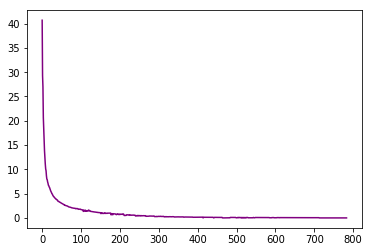

In [33]:
plt.figure()
plt.plot(eig_Val,color="purple")
plt.show()

In [35]:
eigen_list=zip(eig_Val,eig_vec) #tupling
eigen_list=list(eigen_list)     #casting into list
print(len(eigen_list))

784


In [60]:
#sorting the list
eigen_list=sorted(eigen_list,key=lambda e:e[0],reverse=True)
eigen_list[50][1][:5]

array([-0.00020135,  0.00041632,  0.00026113,  0.0032267 , -0.00190444])

In [63]:
eig_values,eig_vectors=list(),list()
for L,V in eigen_list:
    eig_values.append(L)
    eig_vectors.append(V)   #contain list of numpyarray

eig_values=np.array(eig_values)
eig_vectors=np.array(eig_vectors)
print(eig_values.shape,eig_vectors.shape)

(784,) (784, 784)


### Cummulative Percentage and Explain VarianceFunction

In [64]:
eig_cumm=np.cumsum(eig_values)/eig_values.sum() #here np.cumsum return list of cumsum before the index
print(eig_cumm.shape)
print(eig_cumm[:5])

(784,)
[0.05715993 0.09832126 0.13619787 0.16520812 0.1907618 ]


#### Graph -- % of feature gain At No of eigen vector or new Feature include  or PC include

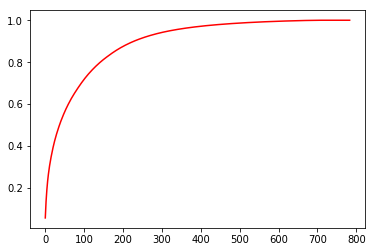

In [65]:
plt.figure()
plt.plot(eig_cumm,color="red")
plt.show()

In [66]:
def get_k(per_gain=0.95):
    k=0
    for i in range(eig_cumm.shape[0]):
        k=i
        if eig_cumm[i]>=per_gain:
            break
    return k

In [68]:
get_k(0.50)

37

In [76]:
def Explain_Variances(No_of_PC):
    if No_of_PC is None:
        No_of_PC=eig_cumm.shape[0]/2
        
    Gain=eig_cumm[No_of_PC]*100
    Loss=100-Gain
    return Gain,Loss

In [77]:
Explain_Variances(400)

(97.13842590885396, 2.8615740911460392)

### Graph--% of Gain and Loss At Diff Eigen Vector)

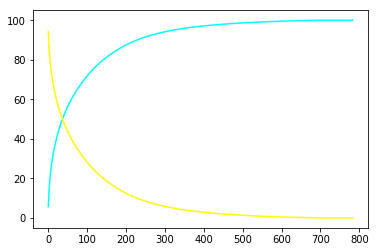

In [79]:
Gain=[Explain_Variances(i)[0] for i in range(784)]
Loss=[Explain_Variances(i)[1] for i in range(784)]
plt.figure()
plt.plot(Gain,color="cyan")
plt.plot(Loss,color="yellow")
plt.show()

### Projection Matrix

In [80]:
#Now choose k Acc to how many Feature u want to choose
Red_dim=get_k(per_gain=0.95)
Real_dim=eig_values.shape[0]
print(k,dim)

322 784


In [81]:
topKEigenVector=[]
for i in range(k):
    topKEigenVector.append(eig_vectors[:,i].reshape(dim,1))
T_matrix=np.hstack(topKEigenVector) #in reality it is transpose
T_matrix.shape

(784, 322)

In [82]:
print(x_std.shape)

(40000, 784)


In [83]:
New_Feature_matrix=x_std.dot(T_matrix) #one 784 multipy with col of 322 eigen vector or new feature or pc or new axis at which we project every dim
print(New_Feature_matrix.shape)

(40000, 322)


## Implementation PCA Using SkLearn

In [84]:
from sklearn.decomposition import PCA
import datetime

In [87]:
Explain_Variances(33)

(48.1093658027345, 51.8906341972655)

In [94]:
timeStart=datetime.datetime.now()
pca=PCA(n_components=333)
X_sk=pca.fit_transform(x_std)
print(datetime.datetime.now()-timeStart)

0:00:11.983860


In [95]:
X_sk.shape

(40000, 333)

In [99]:
var=pca.explained_variance_ratio_

print(var[:4])   
cum=np.cumsum(var)/np.sum(var)
cum[:10]

[0.05715993 0.04116133 0.03787661 0.02901026]


array([0.05996744, 0.10315049, 0.14288748, 0.17332262, 0.20013141,
       0.22357099, 0.24399907, 0.26238409, 0.27875717, 0.29364477])

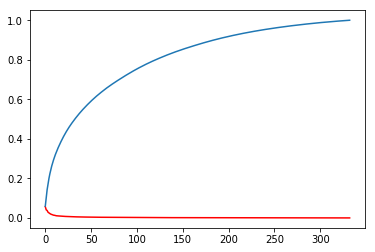

In [102]:
plt.figure()
plt.plot(var,color="red")
plt.plot(cum)
plt.show()

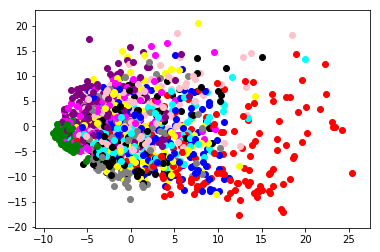

In [111]:
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'cyan', 'purple', 'gray', 'magenta']

plt.figure()
for i in range(1550):
    plt.scatter(X_sk[i,0], X_sk[i,1], color=colors[labels[i]])
plt.show()